In [531]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

{'0': [10, 10],
 '1': [10, 28],
 '2': [10, 46],
 '3': [10, 64],
 '4': [10, 82],
 '5': [30, 10],
 '6': [30, 28],
 '7': [30, 46],
 '8': [30, 64],
 '9': [30, 82],
 '10': [50, 10],
 '11': [50, 28],
 '12': [50, 46],
 '13': [50, 64],
 '14': [50, 82],
 '15': [70, 10],
 '16': [70, 28],
 '17': [70, 46],
 '18': [70, 64],
 '19': [70, 82],
 '20': [90, 10],
 '21': [90, 28],
 '22': [90, 46],
 '23': [90, 64],
 '24': [90, 82]}

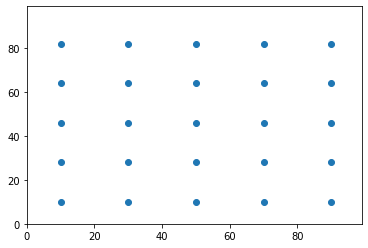

In [742]:
# This notebook generates seating charts and rooms for bus_class
# 1. make seating_small n = 25
# 10 x 10 x 10 meters
# 5 x 5
x_list1 = []
y_list1 = []
xs = []
ys = []
for i in range(5):
    for j in range(5):
        x_list1.append(i * 20 + 10)
        y_list1.append(j * 18 + 10)
plt.scatter(x_list1, y_list1)
plt.xlim(0, 99)
plt.ylim(0, 99)
student_dict = {str(i): [x_list1[i], y_list1[i]] for i in range(25)}
student_dict

{0: [6, 62], 1: [6, 78], 2: [14, 62], 3: [14, 78], 4: [26, 22], 5: [26, 38], 6: [34, 22], 7: [34, 38], 8: [46, 62], 9: [46, 78], 10: [54, 62], 11: [54, 78], 12: [66, 22], 13: [66, 38], 14: [74, 22], 15: [74, 38], 16: [86, 62], 17: [86, 78], 18: [94, 62], 19: [94, 78], 20: [14, 30], 21: [10, 38], 22: [6, 30], 23: [10, 22], 24: [34, 70], 25: [30, 78], 26: [26, 70], 27: [30, 62], 28: [54, 30], 29: [50, 38], 30: [46, 30], 31: [50, 22], 32: [74, 70], 33: [70, 78], 34: [66, 70], 35: [70, 62], 36: [94, 30], 37: [90, 38], 38: [86, 30], 39: [90, 22]}


{'0': [6, 62],
 '1': [6, 78],
 '2': [14, 62],
 '3': [14, 78],
 '4': [26, 22],
 '5': [26, 38],
 '6': [34, 22],
 '7': [34, 38],
 '8': [46, 62],
 '9': [46, 78],
 '10': [54, 62],
 '11': [54, 78],
 '12': [66, 22],
 '13': [66, 38],
 '14': [74, 22],
 '15': [74, 38],
 '16': [86, 62],
 '17': [86, 78],
 '18': [94, 62],
 '19': [94, 78],
 '20': [14, 30],
 '21': [10, 38],
 '22': [6, 30],
 '23': [10, 22],
 '24': [34, 70],
 '25': [30, 78],
 '26': [26, 70],
 '27': [30, 62],
 '28': [54, 30],
 '29': [50, 38],
 '30': [46, 30],
 '31': [50, 22],
 '32': [74, 70],
 '33': [70, 78],
 '34': [66, 70],
 '35': [70, 62],
 '36': [94, 30],
 '37': [90, 38],
 '38': [86, 30],
 '39': [90, 22]}

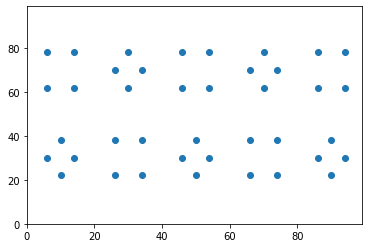

In [743]:
# 2. seating_large n = 40
# 50 x 30 x 10
# 5 tables 8 people per table

tables = 5
students_per_table = 4
student_locations = {i: [] for i in range(40)}
table_locations = [[5, 20], [15, 10], [25, 20], [35, 10], [45, 20]]
table_2locations = [[5, 10], [15, 20], [25, 10], [35, 20], [45, 10]]
dir_list = [[-2, -2], [-2, 2], [2, -2], [2, 2]]
dir_2list = [[2, 0], [0, 2], [-2, 0], [0, -2]]

for i in range(tables):
    for s in range(students_per_table):
        idx = 4 * i + s
        table_x, table_y = table_locations[i]
        x, y = dir_list[s]
        student_locations[idx].append(2 *(table_x + x))
        student_locations[idx].append(4 * (table_y + y) - 10)

for i in range(tables):
    for s in range(students_per_table):
        idx = 4 * i + s + 20
        table_x, table_y = table_2locations[i]
        x, y = dir_2list[s]
        student_locations[idx].append(2 *(table_x + x))
        student_locations[idx].append(4 * (table_y + y) - 10)
print(student_locations)
        
x_list = []
y_list = []
for i, j in list(student_locations.values()):
    x_list.append(i)
    y_list.append(j)
plt.scatter(x_list, y_list)
plt.xlim(0, 99)
plt.ylim(0, 99)
student_dict = {str(i): [x_list[i], y_list[i]] for i in range(40)}
student_dict

In [672]:
# 3. seating_library n = 100
# Scattered 2x2 seating with more seats than students

In [673]:
# 4. seating_gym n = 100
# 2 sides of tiered seating- do math for occupancy

In [674]:
# 5. seating_hallway n = 50
# seating = initial positions = random
# add and subtract students when x breaks min and max threshold
# This and Bathroom should be a flow- students spend random amount of time from 0-2 minutes going through (sim. lockers)
# behavior = straight line +x, vary y

In [675]:
# 6. seating_bathroom n = 5
# initial positions = none

(0.0, 9.0)

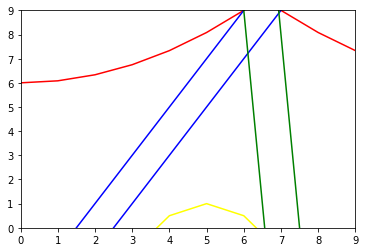

In [737]:
# make airflow function for small
x = range(10)
y1 = [(i**2 / 12) + 6 for i in x]
y2 = [(i-13)**2 / 12 + 6 for i in x]
y3 = [i * 2 - 3 for i in x]
y4 = [i * 2 - 5 for i in x]
y5 = [-(i * 16) + 120 for i in x]
y6 = [-(i * 16) + 105 for i in x]
y7 = [-((i-5)** 2)/2 + 1 for i in x]

# (1, 0) t
plt.plot(x, y1, color='red') # vent left
plt.plot(x, y2, color='red') # vent right
plt.plot(x, y3, color='blue') # window 1 left
plt.plot(x, y4, color='blue') # window 1 right
plt.plot(x, y5, color='green') # window 2 left
plt.plot(x, y6, color='green') # window 2 right
plt.plot(x, y7, color='yellow') # window 2 right
# velocity
plt.xlim(0, 9)
plt.ylim(0, 9)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]


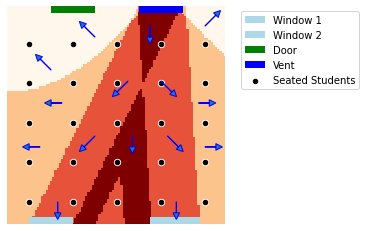

In [738]:
# make airflow function for small
# use this to fine tune the above for student seating
x2 = [i / 10 for i in range(100)]
print(x2)
y12 = [(i**2 / 10) + 6 for i in x2]
y22 = [(i-14)**2 / 10 + 6 for i in x2]

y32 = [(i - 7) * 10  for i in x2]
y42 = [(i - 6) * 10 for i in x2]


y32 = [i * 2 - 2 for i in x2]
y42 = [i * 2 - 6 for i in x2]

y52 = [-(i * 16) + 140 for i in x2]
y62 = [-(i * 16) + 105 for i in x2]
def vents_small_10cm_boxes():
    room_matrix = [[1 for col in range(100)] for row in range(100)]
    for i in range(100):
        for j in range(100):
            if j / 10 <= y12[i]:
                room_matrix[j][i] += 1
            if j / 10 >= y22[i]:
                room_matrix[j][i] -= 1
            # left window
            if j / 10 < y32[i]:
                room_matrix[j][i] += 1
            if j / 10 > y42[i]:
                room_matrix[j][i] -= 1
#             # right window
            if j / 10 < y52[i]:
                room_matrix[j][i] += 1
            if j / 10 > y62[i]:
                room_matrix[j][i] -= 1
#             between windows
            if (j/10 > y42[i]) and (j/10 > y62[i]):
                room_matrix[j][i] += 2
            if (j / 10 + 2 < y42[i]) and (j / 10  + 20 < y62[i]):
                room_matrix[j][i] -= 1
    return room_matrix
    
cm10_velocity = vents_small_10cm_boxes()
fig, ax = plt.subplots()
ax.matshow(cm10_velocity, cmap=plt.get_cmap("OrRd"))
# windows
ax.add_patch(mpl.patches.Rectangle((10, 0), 20, 3, facecolor="lightblue", label="Window 1"))
ax.add_patch(mpl.patches.Rectangle((65, 0), 23, 3, facecolor="lightblue", label="Window 2"))
# door
ax.add_patch(mpl.patches.Rectangle((20, 96), 20, 3, facecolor="green", label="Door"))
# Vent
ax.add_patch(mpl.patches.Rectangle((60, 96), 20, 3, facecolor="blue", label="Vent"))

# Flow Arrows:
# Top Left
ax.arrow(40, 85, -5, 5, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(20, 70, -5, 5, head_length=3, head_width=3, edgecolor='blue')

ax.arrow(25, 55, -5, 0, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(15, 35, -5, 0, head_length=3, head_width=3, edgecolor='blue')

ax.arrow(55, 65, -5, -5, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(40, 40, -5, -5, head_length=3, head_width=3, edgecolor='blue')

ax.arrow(65, 90, 0, -5, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(57, 40, 0, -5, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(77, 10, 0, -5, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(23, 10, 0, -5, head_length=3, head_width=3, edgecolor='blue')

ax.arrow(70, 65, 5, -5, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(73, 40, 5, -5, head_length=3, head_width=3, edgecolor='blue')

ax.arrow(87, 55, 5, 0, head_length=3, head_width=3, edgecolor='blue')
ax.arrow(90, 35, 5, 0, head_length=3, head_width=3, edgecolor='blue')

ax.arrow(90, 90, 5, 5, head_length=3, head_width=3, edgecolor='blue')



ax.set_xlim(0, 99)
ax.set_ylim(0, 99)
plt.axis('off')
plt.scatter(x_list1, y_list1, c='white', s=40)
plt.scatter(x_list1, y_list1, c='black', s=20, label='Seated Students')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [745]:
np.array(cm10_velocity)

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])